In [3]:
import pandas as pd
import os

In [2]:
dataset_path = "/kaggle/input/threat-classification-dataset"

# List all CSV files in the dataset directory
file_paths = [os.path.join(dataset_path, file) for file in os.listdir(dataset_path) if file.endswith(".csv")]

# Load and concatenate all CSV files
data = pd.concat([pd.read_csv(file, low_memory=False) for file in file_paths], ignore_index=True)

In [4]:
data.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,1266342,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,22,1319353,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,22,160,1,1,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,22,1303488,41,42,2728,6634,456,0,66.536585,110.129945,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,35396,77,1,2,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [5]:
data.to_csv("/kaggle/working/CICIDS2017_combined.csv", index=False)

In [6]:
data.columns.values

array([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length',
       ' Packet Length Mean', ' Packet Length Std',
       ' Packet Length Varia

In [7]:
data.dtypes

 Destination Port                int64
 Flow Duration                   int64
 Total Fwd Packets               int64
 Total Backward Packets          int64
Total Length of Fwd Packets      int64
                                ...   
Idle Mean                      float64
 Idle Std                      float64
 Idle Max                        int64
 Idle Min                        int64
 Label                          object
Length: 79, dtype: object

In [8]:
data.columns=data.columns.str.strip()

In [9]:
data['Label'].value_counts()

Label
BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

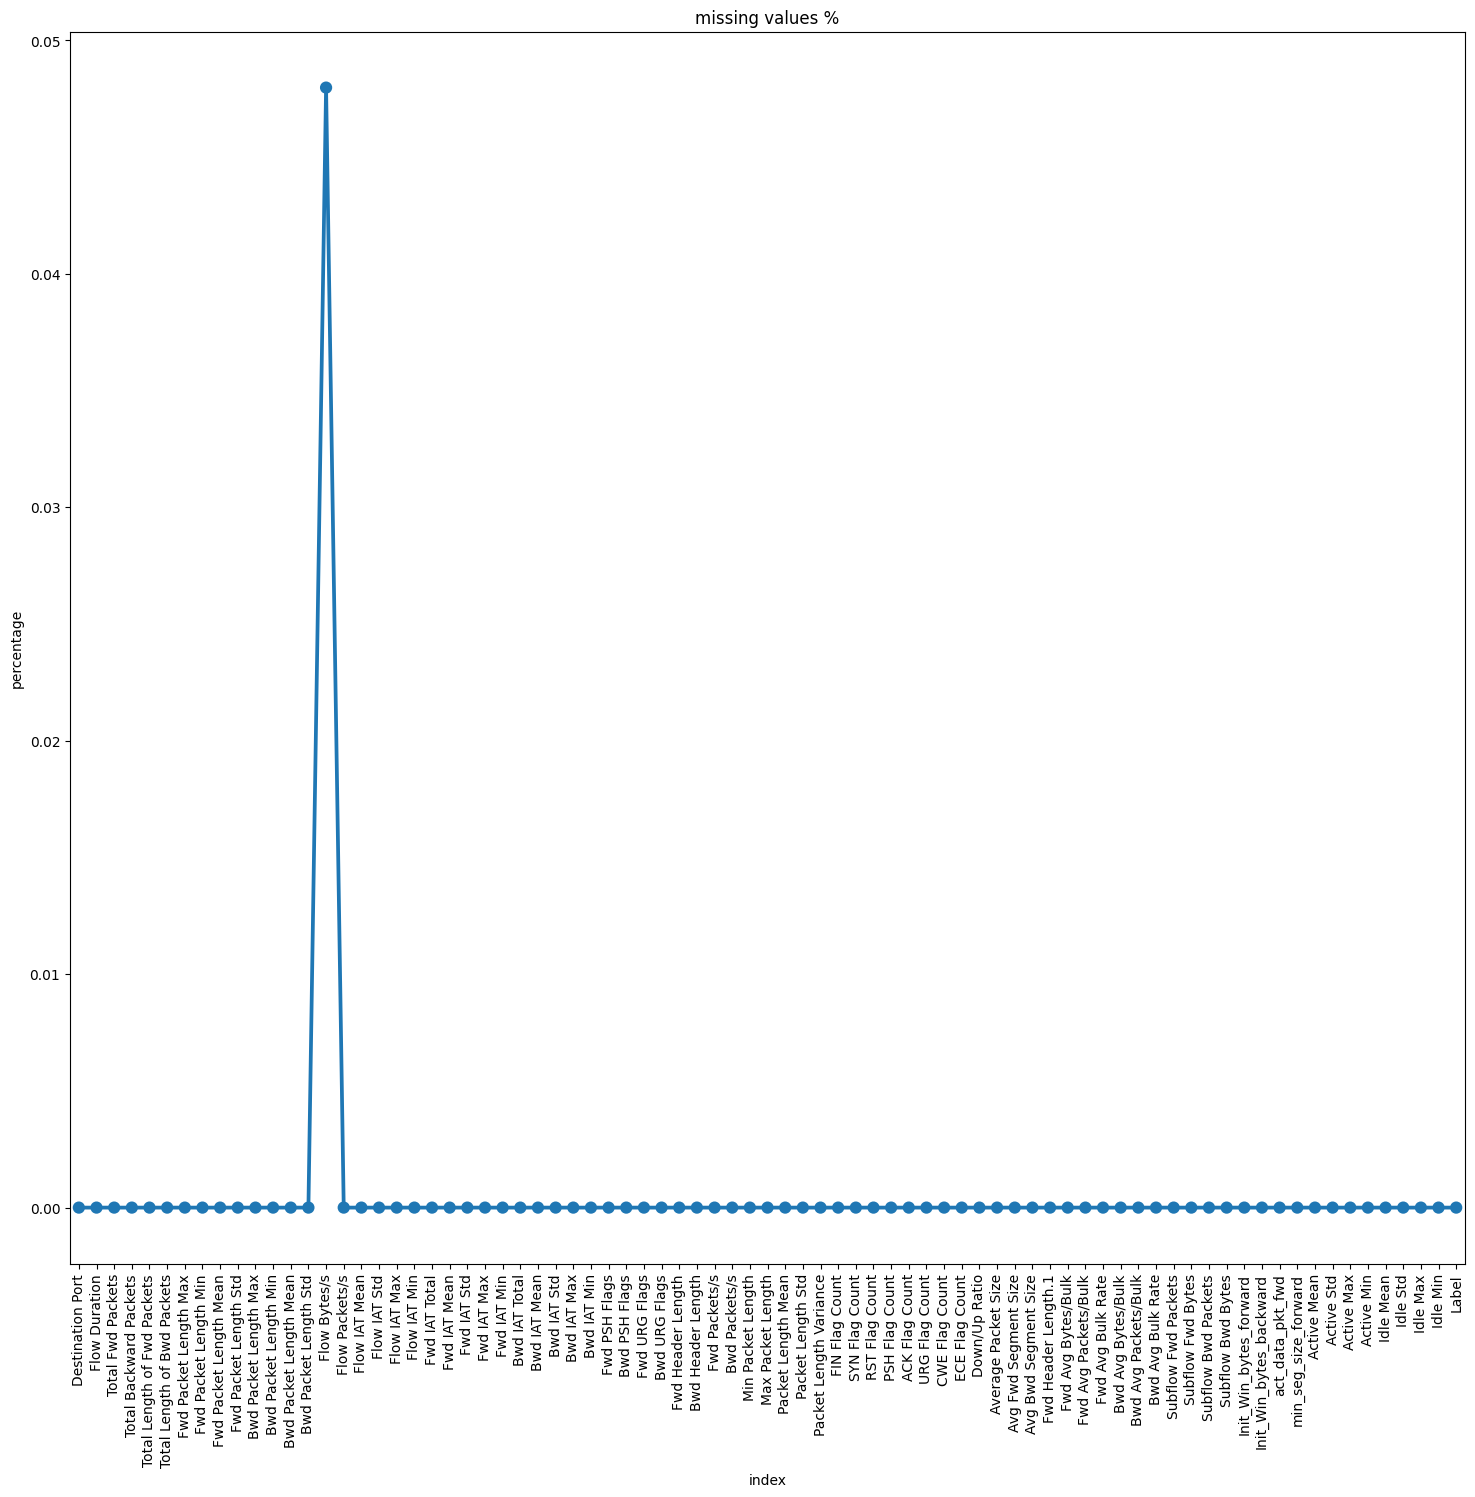

In [11]:
missing=pd.DataFrame((data.isnull().sum())*100/data.shape[0]).reset_index()
plt.figure(figsize=(18,16))
ax=sns.pointplot(x='index', y=0,data=missing)
plt.xticks(rotation=90, size=10)
plt.title("missing values %")
plt.ylabel("percentage")
plt.show()

In [12]:
data=data.dropna(subset=['Flow Bytes/s'])

In [13]:
zero_percent=(data==0).sum()/len(data)*100

In [14]:
pd.set_option('display.max_rows', None) 
print(zero_percent.sort_values(ascending=False))

Bwd Avg Packets/Bulk           100.000000
Bwd Avg Bulk Rate              100.000000
Bwd Avg Bytes/Bulk             100.000000
Fwd Avg Packets/Bulk           100.000000
Bwd PSH Flags                  100.000000
Bwd URG Flags                  100.000000
Fwd Avg Bulk Rate              100.000000
Fwd Avg Bytes/Bulk             100.000000
Fwd URG Flags                   99.988867
CWE Flag Count                  99.988867
RST Flag Count                  99.975754
ECE Flag Count                  99.975648
FIN Flag Count                  96.462023
Fwd PSH Flags                   95.353124
SYN Flag Count                  95.353124
Active Std                      92.735736
Idle Std                        91.897780
URG Flag Count                  90.515960
Active Max                      80.249100
Active Min                      80.249100
Active Mean                     80.249100
Idle Min                        79.950307
Idle Mean                       79.950307
Idle Max                        79

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


<function matplotlib.pyplot.show(close=None, block=None)>

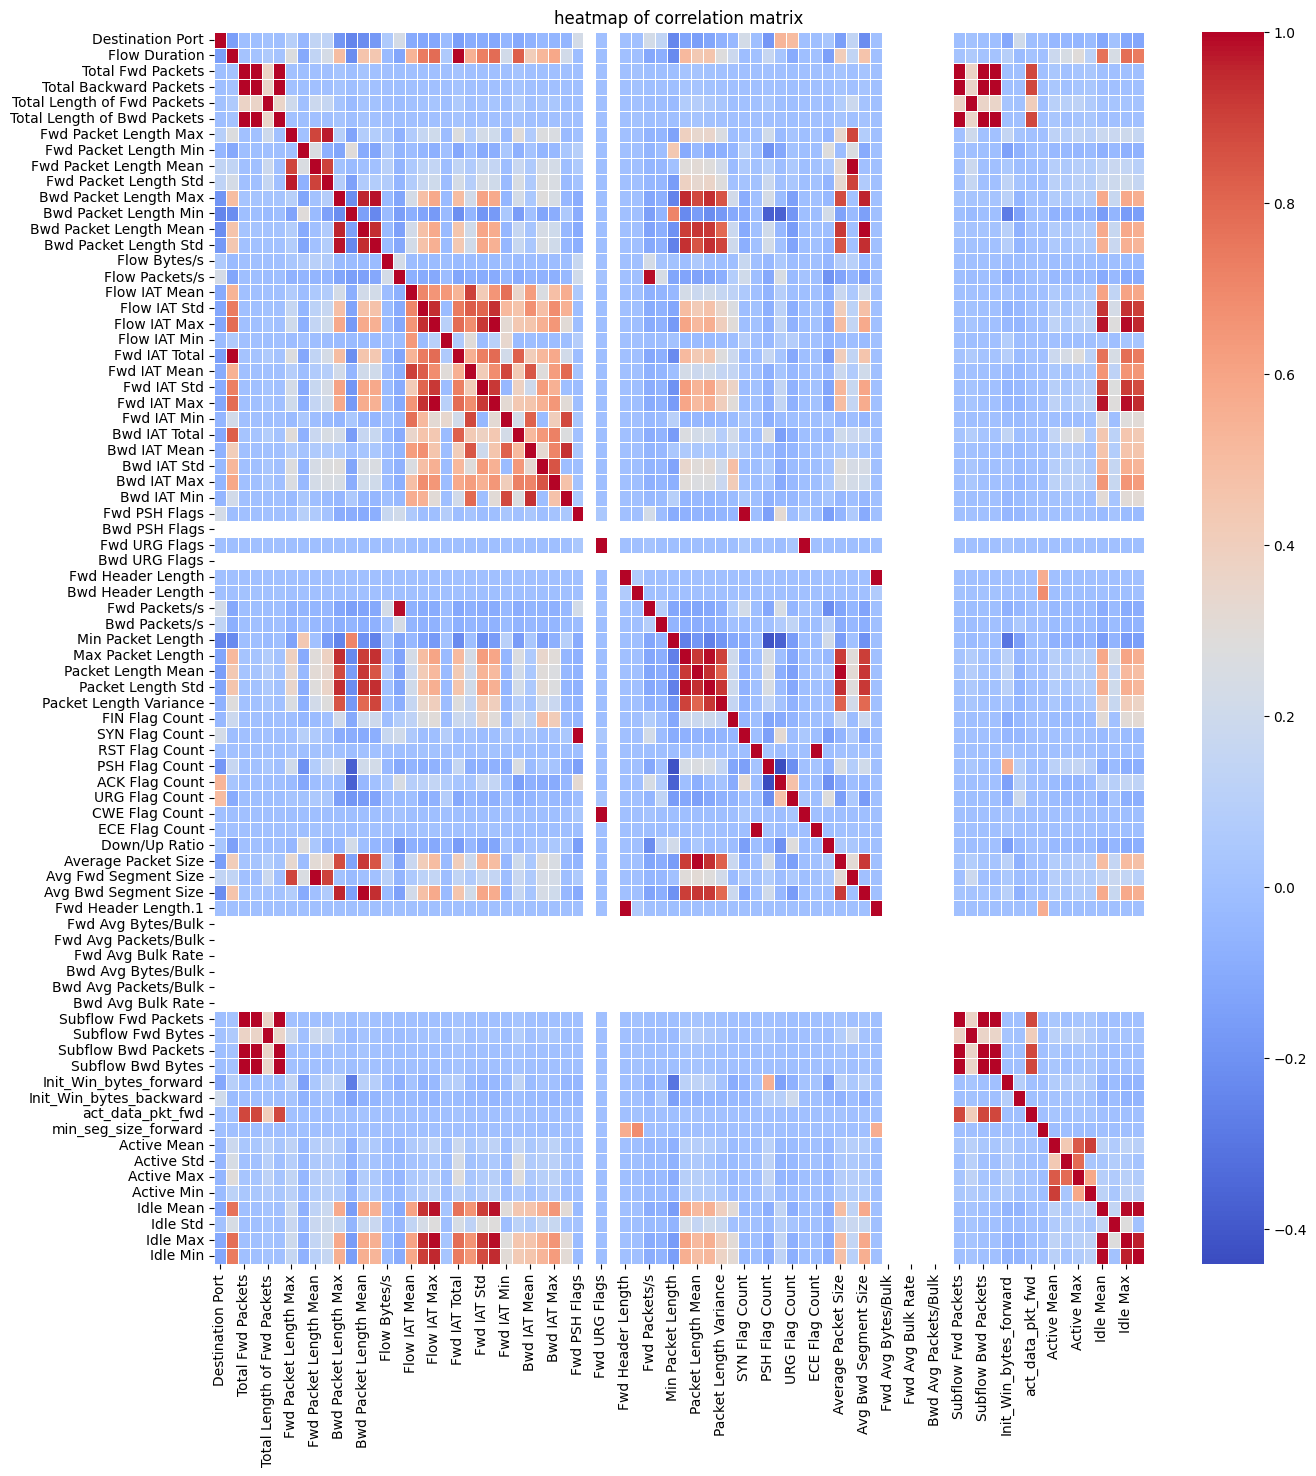

In [15]:
df_without_label = data.drop(columns=['Label'])
corr_matrix=df_without_label.corr()
plt.figure(figsize=(15,16))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("heatmap of correlation matrix")
plt.show

In [18]:
from sklearn.feature_selection import VarianceThreshold
import numpy as np

In [19]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(inplace=True)

In [20]:
import numpy as np
X = data.drop(columns=['Label'])  
X.replace([np.inf, -np.inf], np.nan, inplace=True)
print(X.isna().sum().sum(), "NaN values found")

0 NaN values found


In [21]:
print(X.isna().sum())
print(X.isna().any(axis=1).sum())

Destination Port               0
Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
Total Length of Bwd Packets    0
Fwd Packet Length Max          0
Fwd Packet Length Min          0
Fwd Packet Length Mean         0
Fwd Packet Length Std          0
Bwd Packet Length Max          0
Bwd Packet Length Min          0
Bwd Packet Length Mean         0
Bwd Packet Length Std          0
Flow Bytes/s                   0
Flow Packets/s                 0
Flow IAT Mean                  0
Flow IAT Std                   0
Flow IAT Max                   0
Flow IAT Min                   0
Fwd IAT Total                  0
Fwd IAT Mean                   0
Fwd IAT Std                    0
Fwd IAT Max                    0
Fwd IAT Min                    0
Bwd IAT Total                  0
Bwd IAT Mean                   0
Bwd IAT Std                    0
Bwd IAT Max                    0
Bwd IAT Min                    0
Fwd PSH Fl

In [22]:
selector=VarianceThreshold(threshold=0.2)
# Apply to your dataset (excluding the target column)
X_selected = selector.fit_transform(X)  # X should be your feature matrix

# Get the selected feature names
selected_features = X.columns[selector.get_support()]

print("Selected features:", list(selected_features))

Selected features: ['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'PSH Flag Count', 'ACK Flag Count', 'Down/Up Ratio', 'Average Packet Size', 'Avg Fwd Segment Size', 'Avg Bwd Segment Size', 'Fwd Header Length.1', 'Subflow Fwd Packets', 'Subflow Fwd Bytes',

In [29]:
y=data['Label']
print(y.unique()) 

['BENIGN' 'PortScan' 'Web Attack � Brute Force' 'Web Attack � XSS'
 'Web Attack � Sql Injection' 'FTP-Patator' 'SSH-Patator' 'DDoS' 'Bot'
 'Infiltration' 'DoS slowloris' 'DoS Slowhttptest' 'DoS Hulk'
 'DoS GoldenEye' 'Heartbleed']


In [31]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(sparse_output=False)
y_encoded = one_hot_encoder.fit_transform(y.values.reshape(-1, 1))

In [33]:
selected_features = [
    'Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
    'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max',
    'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max',
    'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
    'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
    'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
    'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min',
    'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
    'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std',
    'Packet Length Variance', 'PSH Flag Count', 'ACK Flag Count', 'Down/Up Ratio',
    'Average Packet Size', 'Avg Fwd Segment Size', 'Avg Bwd Segment Size',
    'Fwd Header Length.1', 'Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Subflow Bwd Packets',
    'Subflow Bwd Bytes', 'Init_Win_bytes_forward', 'Init_Win_bytes_backward',
    'act_data_pkt_fwd', 'min_seg_size_forward', 'Active Mean', 'Active Std',
    'Active Max', 'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min'
]

# Define X and y
X = data[selected_features]

In [34]:
from sklearn.model_selection import train_test_split

# Splitting into train (70%), validation (15%), and test (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")

Training set: (1979513, 62), Validation set: (424181, 62), Test set: (424182, 62)


In [41]:
import lightgbm as lgb
import xgboost as xgb
import catboost as cb
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [43]:
print(y_train.shape)

(1979513, 15)


In [44]:
xgb_model = OneVsRestClassifier(xgb.XGBClassifier(
    n_estimators=100,
    max_depth=10,
    tree_method="hist",  # Use histogram-based algorithm
    device="cuda",  # Run on GPU
    random_state=42
))

xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

In [47]:
def evaluate_model(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro', zero_division=1)
    recall = recall_score(y_true, y_pred, average='macro', zero_division=1)
    f1 = f1_score(y_true, y_pred, average='macro')

    print(f"\n{model_name} Metrics:")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    
    return acc, precision, recall, f1


In [48]:
evaluate_model(y_test, y_pred_xgb, "XGBoost")


XGBoost Metrics:
Accuracy: 0.9989
Precision: 0.9416
Recall: 0.8424
F1 Score: 0.8546


(0.9988849126082672,
 0.9416343615636997,
 0.8423996308123466,
 0.8546066065782427)

In [57]:
cat_model = MultiOutputClassifier(cb.CatBoostClassifier(
    iterations=100,
    depth=10,
    task_type="GPU",  # Run on GPU
    verbose=0,
    random_seed=42
))

cat_model.fit(X_train, y_train)
y_pred_cat = cat_model.predict(X_test)


In [58]:
evaluate_model(y_test, y_pred_cat, "CatBoost")


CatBoost Metrics:
Accuracy: 0.9988
Precision: 0.9338
Recall: 0.8315
F1 Score: 0.8432


(0.9987835410272006,
 0.9338041771100758,
 0.8314572152092514,
 0.8431664948607107)

In [62]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true.argmax(axis=1), y_pred.argmax(axis=1))
    plt.figure(figsize=(18,6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix: {model_name}")
    plt.show()

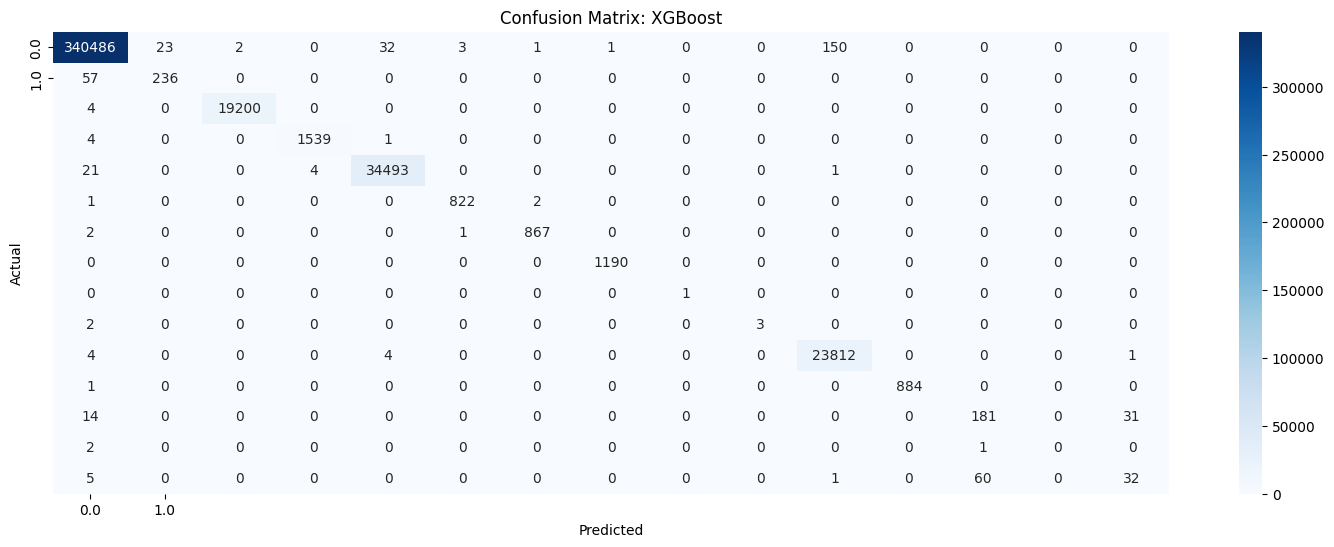

In [63]:
plot_confusion_matrix(y_test, y_pred_xgb, "XGBoost")

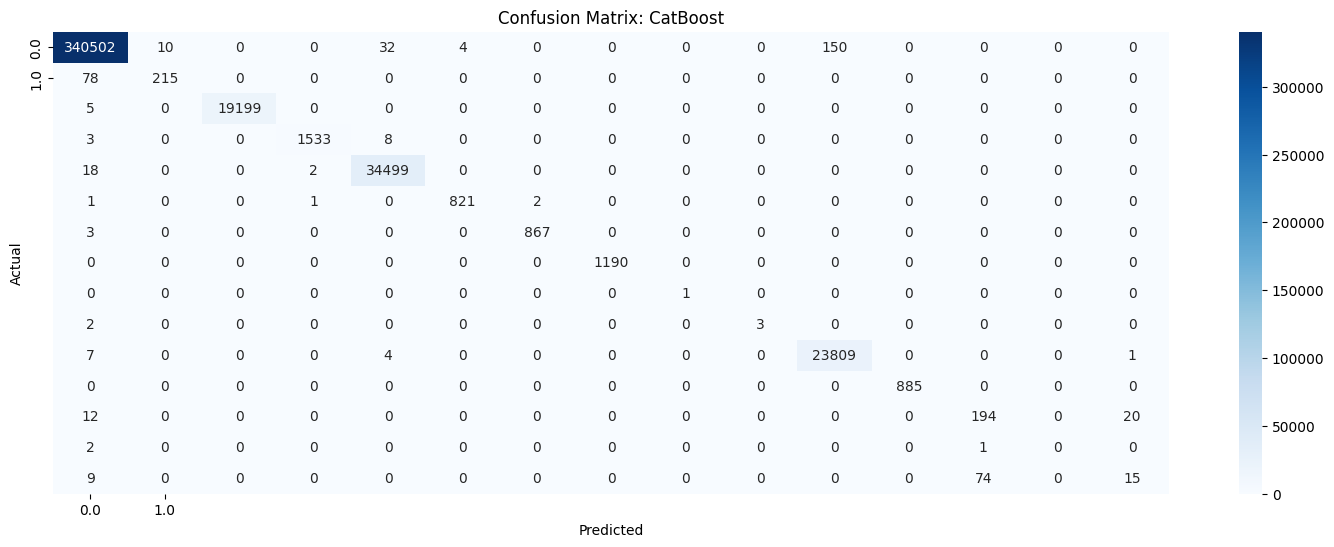

In [64]:
plot_confusion_matrix(y_test, y_pred_cat, "CatBoost")